# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=


In [4]:
# Create empty lists to append the API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize record to one
record = 1

In [6]:
# Start print statement 
print(f'Beginning of Data Retrieval\n-----------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Keep appending lists despite missing values
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Replace the spaces between city names that have more than one word
        city_name_record = city.replace(" ", "%20")
        
        # Print output
        print(f'Processing Record {record} | {city}')
        print(f'{query_url}{city_name_record}')
       
        # Increase record by one
        record = record + 1
        
        # Pause loop for one second
        time.sleep(1)
        
 
    # If city is not found, skip to the next     
    except:
        print("City not found. Skipping...")

Beginning of Data Retrieval
-----------------------------------
Processing Record 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=saskylakh
Processing Record 2 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=atuona
Processing Record 3 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=rikitea
Processing Record 4 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=te%20anau
Processing Record 5 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=carnarvon
Processing Record 6 | chipinge
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=chipinge
Processing Record 7 | bronnoysund
http://api.openweathermap.org/data/2.5/weather

Processing Record 57 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tiksi
Processing Record 58 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hobart
City not found. Skipping...
Processing Record 59 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=saldanha
Processing Record 60 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hermanus
Processing Record 61 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=butaritari
Processing Record 62 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=busselton
Processing Record 63 | kijang
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de

Processing Record 113 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=praia%20da%20vitoria
City not found. Skipping...
Processing Record 114 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=udachnyy
Processing Record 115 | razdolinsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=razdolinsk
Processing Record 116 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hambantota
Processing Record 117 | neryungri
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=neryungri
Processing Record 118 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=porto%20novo
Processing Record 119 | gat
http://api.openweathermap.org/data/2.5

Processing Record 168 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tasiilaq
Processing Record 169 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=fort%20nelson
Processing Record 170 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sao%20filipe
Processing Record 171 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=labuhan
City not found. Skipping...
Processing Record 172 | bom jesus
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=bom%20jesus
Processing Record 173 | tafalla
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tafalla
Processing Record 174 | zlobin
http://api.openweathermap.org/data/2.5/weather?appid=6d9d

Processing Record 222 | dzerzhinsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dzerzhinsk
Processing Record 223 | upata
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=upata
Processing Record 224 | pontianak
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=pontianak
City not found. Skipping...
Processing Record 225 | xiaoshi
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=xiaoshi
City not found. Skipping...
Processing Record 226 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=namibe
Processing Record 227 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=north%20bend
City not found. Skipping...
Processing Record 228 | ust-ishim
http://api.o

Processing Record 277 | ruidoso
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ruidoso
Processing Record 278 | camana
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=camana
Processing Record 279 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=puerto%20ayacucho
Processing Record 280 | sechura
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sechura
Processing Record 281 | da nang
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=da%20nang
Processing Record 282 | biak
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=biak
Processing Record 283 | kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=impe

Processing Record 333 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=alta%20floresta
Processing Record 334 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=esperance
Processing Record 335 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=noyabrsk
Processing Record 336 | nong han
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nong%20han
Processing Record 337 | mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=mabaruma
Processing Record 338 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nouadhibou
Processing Record 339 | tarauaca
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6

Processing Record 389 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=coquimbo
Processing Record 390 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=marsh%20harbour
Processing Record 391 | coachella
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=coachella
Processing Record 392 | dinguiraye
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dinguiraye
City not found. Skipping...
Processing Record 393 | markapur
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=markapur
Processing Record 394 | dubuque
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dubuque
Processing Record 395 | chuncheng
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 445 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nemuro
Processing Record 446 | borken
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=borken
Processing Record 447 | chadiza
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=chadiza
Processing Record 448 | waingapu
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=waingapu
City not found. Skipping...
Processing Record 449 | maloyaroslavets
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=maloyaroslavets
City not found. Skipping...
Processing Record 450 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tiznit
City not found. Skipping...
Processing Record 451 | buenos aires
http://ap

Processing Record 501 | troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=troitsko-pechorsk
Processing Record 502 | zolotkovo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=zolotkovo
Processing Record 503 | xining
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=xining
Processing Record 504 | tatawin
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tatawin
Processing Record 505 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=maniitsoq
Processing Record 506 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=rawson
Processing Record 507 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictionary using the lists above 
cities_summary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Convert dictionary into a DataFrame
weather_data = pd.DataFrame(cities_summary)

# Count values 
weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [9]:
# Export DataFrame into a csv file
weather_data.to_csv("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Data_CSV/weather_data.csv")


# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,100,RU,1581150795,94,71.92,114.08,-7.26,10.78
1,Atuona,0,PF,1581150796,76,-9.80,-139.03,80.96,19.28
2,Rikitea,100,PF,1581150798,78,-23.12,-134.97,78.15,15.50
3,Te Anau,49,NZ,1581150799,64,-45.42,167.72,45.01,2.01
4,Carnarvon,100,AU,1581150800,74,-24.87,113.63,84.20,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

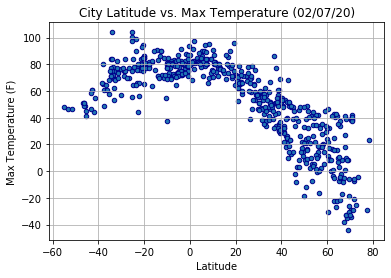

In [10]:

# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_temp.png")


# Display scatter plot
plt.show()

#### Latitude vs. Humidity Plot

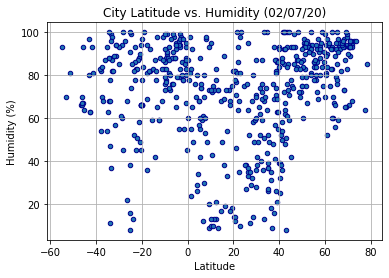

In [11]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Humidity (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_humidity.png")

# Display scatter plot
plt.show()

#### Latitude vs. Cloudiness Plot

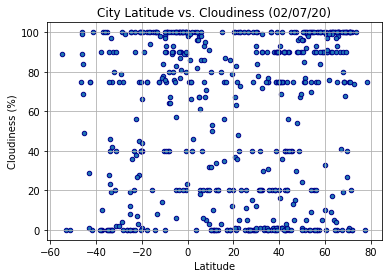

In [12]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_cloudiness.png")

# Display scatter plot
plt.show()

#### Latitude vs. Wind Speed Plot

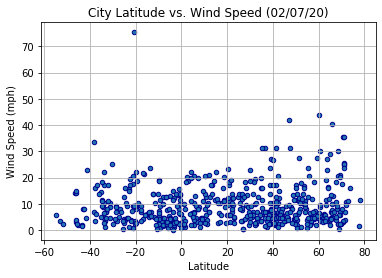

In [14]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_wind.png")

# Display scatter plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
def gethemisphere(row):

    if row['Lat'] <=0:

        val = 'Southern'

    elif row['Lat'] > 0:

        val = 'Northern'

    return val

In [19]:
# Create Northern and Southern Hemisphere DataFrames
weather_data['Hemisphere'] = weather_data.apply(gethemisphere, axis=1)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Saskylakh,100,RU,1581150795,94,71.92,114.08,-7.26,10.78,Northern
1,Atuona,0,PF,1581150796,76,-9.80,-139.03,80.96,19.28,Southern
2,Rikitea,100,PF,1581150798,78,-23.12,-134.97,78.15,15.50,Southern
3,Te Anau,49,NZ,1581150799,64,-45.42,167.72,45.01,2.01,Southern
4,Carnarvon,100,AU,1581150800,74,-24.87,113.63,84.20,16.11,Southern


In [22]:
#hemisphere_df = weather_data.set_index('Hemisphere')
#hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
Hemisphere,,,,,,,,,
Northern,Saskylakh,100,RU,1581150795,94,71.92,114.08,-7.26,10.78
Southern,Atuona,0,PF,1581150796,76,-9.80,-139.03,80.96,19.28
Southern,Rikitea,100,PF,1581150798,78,-23.12,-134.97,78.15,15.50
Southern,Te Anau,49,NZ,1581150799,64,-45.42,167.72,45.01,2.01
Southern,Carnarvon,100,AU,1581150800,74,-24.87,113.63,84.20,16.11


In [27]:
northern_df = weather_data.loc[weather_data["Hemisphere"]== "Northern"]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Saskylakh,100,RU,1581150795,94,71.92,114.08,-7.26,10.78,Northern
6,Bronnoysund,93,NO,1581150803,100,65.46,12.20,33.80,4.70,Northern
7,Sakakah,12,SA,1581150804,28,29.97,40.21,57.20,23.04,Northern
8,Kapaa,1,US,1581150806,93,22.08,-159.32,64.99,6.93,Northern
14,Union de San Antonio,0,MX,1581150814,46,21.10,-101.97,52.43,2.93,Northern


In [28]:
southern_df = weather_data.loc[weather_data["Hemisphere"]== "Southern"]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,Atuona,0,PF,1581150796,76,-9.80,-139.03,80.96,19.28,Southern
2,Rikitea,100,PF,1581150798,78,-23.12,-134.97,78.15,15.50,Southern
3,Te Anau,49,NZ,1581150799,64,-45.42,167.72,45.01,2.01,Southern
4,Carnarvon,100,AU,1581150800,74,-24.87,113.63,84.20,16.11,Southern
5,Chipinge,100,ZW,1581150802,66,-20.19,32.62,79.66,3.11,Southern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


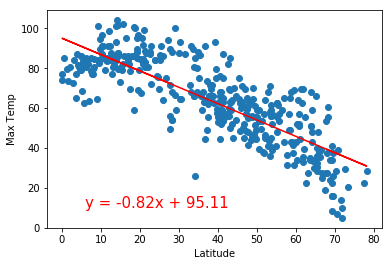

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


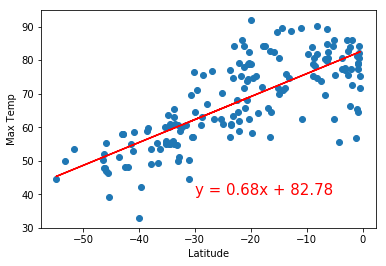

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


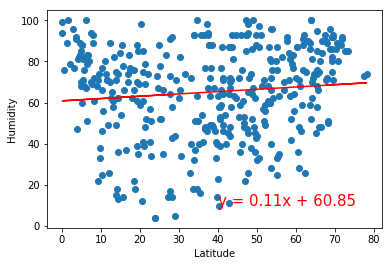

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


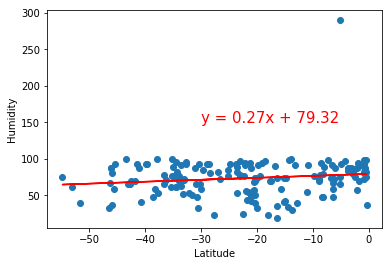

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


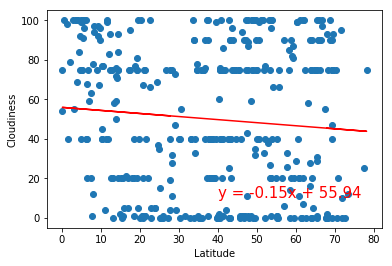

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


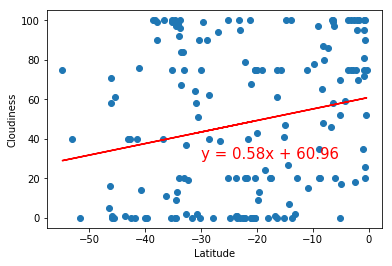

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


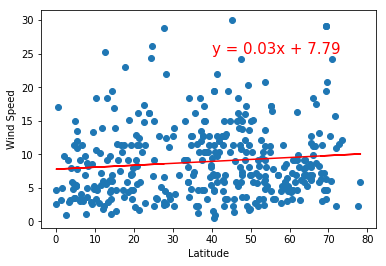

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


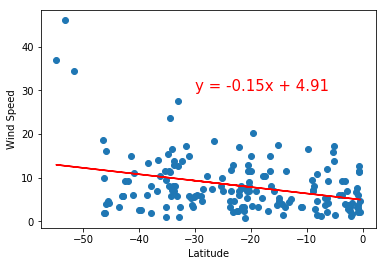